<a href="https://colab.research.google.com/github/Govrie/Govrie.github.io/blob/master/Twitter_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [38]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt



In [39]:
# Twitter Api Credentials
consumerKey = "wuUNfWouFtimj5l5PUk0uYcMu"
consumerSecret = "we9LySp1FKVY9QBcPjlf9W2PL4abUS7M1tW44KkIO3m2ebFkuy"
accessToken = "168671451-qpOiCpxSlxwGzHhn4afsQELIPcP4p8p2thL6k0xL"
accessTokenSecret = "9CINzaz7MAq8XXxZQ49gksmCr8ttnTCG0cWaYgQ6MJBUd"

In [40]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [97]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

2) I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

3) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you @POTUS for your leadership. https://t.co/SVeKp1KPHT

4) It’s encouraging to see @POTUS Biden and @ClimateEnvoy Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. https://t.co/a9CXZzIg6Y

5) Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an en

In [98]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"RT @WHO: The @ACTAccelerator, an unprecedented..."
1,I was honored to speak at today’s #LeadersClim...
2,Ambitious short-term goals like this are criti...
3,It’s encouraging to see @POTUS Biden and @Clim...
4,Yesterday's verdict was a step in the right di...


In [99]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,": The , an unprecedented global alliance to de..."
1,I was honored to speak at today’s LeadersClima...
2,Ambitious short-term goals like this are criti...
3,It’s encouraging to see Biden and Kerry re-e...
4,Yesterday's verdict was a step in the right di...
...,...
95,This book has nothing to do with viruses or pa...
96,Monoclonal antibodies are one of the most prom...
97,: We’re looking for new ways to advance Alzhei...
98,"Like many people, I’ve tried to deepen my unde..."


In [101]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,": The , an unprecedented global alliance to de...",0.450000,0.300000
1,I was honored to speak at today’s LeadersClima...,0.000000,0.000000
2,Ambitious short-term goals like this are criti...,0.668750,0.062500
3,It’s encouraging to see Biden and Kerry re-e...,0.750000,0.450000
4,Yesterday's verdict was a step in the right di...,0.317262,0.079762
...,...,...,...
95,This book has nothing to do with viruses or pa...,0.966667,0.600000
96,Monoclonal antibodies are one of the most prom...,0.525714,0.222857
97,: We’re looking for new ways to advance Alzhei...,0.454545,0.136364
98,"Like many people, I’ve tried to deepen my unde...",0.458000,0.282000


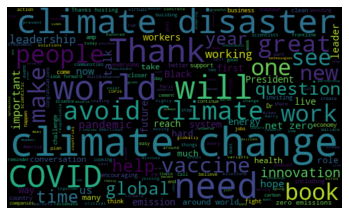

In [102]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [103]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
    # Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": The , an unprecedented global alliance to de...",0.450000,0.300000,Positive
1,I was honored to speak at today’s LeadersClima...,0.000000,0.000000,Neutral
2,Ambitious short-term goals like this are criti...,0.668750,0.062500,Positive
3,It’s encouraging to see Biden and Kerry re-e...,0.750000,0.450000,Positive
4,Yesterday's verdict was a step in the right di...,0.317262,0.079762,Positive
...,...,...,...,...
95,This book has nothing to do with viruses or pa...,0.966667,0.600000,Positive
96,Monoclonal antibodies are one of the most prom...,0.525714,0.222857,Positive
97,: We’re looking for new ways to advance Alzhei...,0.454545,0.136364,Positive
98,"Like many people, I’ve tried to deepen my unde...",0.458000,0.282000,Positive


In [104]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) : The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

2) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. 

3) It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. 

4) Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black people experience daily.  I hope we will continue to make real progress on this.

5) “Time” is a poetic portrait of a family who love and support each other despite their difficult circumstances. I can’t 

In [105]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i] + str(sortedDF['Polarity'][i]))
    print()
    j=j+1

Printing negative tweets:

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. -0.15166666666666667

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. -0.125

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  -0.6

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…-0.225

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and 

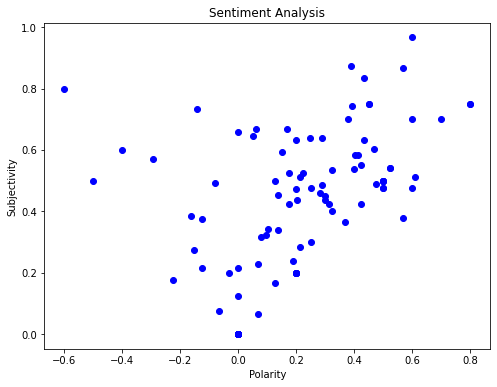

In [106]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [107]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

70.0

In [108]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

14.0

In [109]:
# Show the value counts
df['Analysis'].value_counts()

Positive    70
Neutral     16
Negative    14
Name: Analysis, dtype: int64

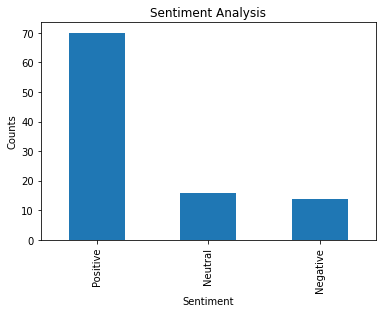

In [110]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [111]:
!pip3 install dostoevsky
!python3 -m dostoevsky download fasttext-social-network-model


In [114]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="Govrie", count = 100, lang ="ru", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Лучше видео для майских выходных:
https://t.co/F49CyX3uHx

2) @byokke Ага!

3) Найдите Говри-семиклассника на фото: https://t.co/I6ODAPKOcb

4) RT @foxikov: @VS_Oblomov Западные партнёры Путина, когда узнали, что шара 90-х закончилась 
#любимыймоментвземнойистории https://t.co/JZZyB…

5) RT @askinprombitch: Коррекция зрения в моем втором доме - республиканской офтальмологической больнице повысилась до 83 косых. Аж прозрела н…



In [139]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Лучше видео для майских выходных:\nhttps://t.c...
1,@byokke Ага!
2,Найдите Говри-семиклассника на фото: https://t...
3,RT @foxikov: @VS_Oblomov Западные партнёры Пут...
4,RT @askinprombitch: Коррекция зрения в моем вт...


In [140]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Лучше видео для майских выходных:\n
1,Ага!
2,Найдите Говри-семиклассника на фото:
3,": _Oblomov Западные партнёры Путина, когда узн..."
4,: Коррекция зрения в моем втором доме - респуб...
...,...
95,"Проголосовал за Мичилиту, основателя ОВД- инфо..."
96,Идея нейминга для будущих проектов
97,Кому стало интересно:
98,"Парейдолия! Бля, за три года в Тиктоке я узнал..."


In [141]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = df['Tweets'].apply(cleanTxt)
results = model.predict(messages, k=2)

def getAnalysis(sentiments):
    for message, sentiment in zip(messages, results):
        return max(sentiment)
df['Analysis'] = df['Tweets'].apply(getAnalysis)
    # Show the dataframe
df



,Tweets,Analysis
0,Лучше видео для майских выходных:\n,positive
1,Ага!,positive
2,Найдите Говри-семиклассника на фото:,positive
3,": _Oblomov Западные партнёры Путина, когда узн...",positive
4,: Коррекция зрения в моем втором доме - респуб...,positive
...,...,...
95,"Проголосовал за Мичилиту, основателя ОВД- инфо...",positive
96,Идея нейминга для будущих проектов,positive
97,Кому стало интересно:,positive
98,"Парейдолия! Бля, за три года в Тиктоке я узнал...",positive
